# Dimensionality reduction exercises with the iris dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer

In [3]:
# load the iris dataset (datasets/iris.csv)
# add code here
iris = pd.read_csv("../../datasets/iris.csv", sep = ",", header = 0, index_col=0)
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [4]:
# do some exploratory data analysis
# add code here
iris.describe()
iris.info()
iris.isna().sum()
iris.duplicated().sum()
iris = iris.drop_duplicates()
iris.duplicated().sum()
Target = iris.Species.values
iris_df = iris.drop("Species", axis = "columns", inplace = True)

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


C:\Users\diogo\AppData\Local\Temp\ipykernel_11276\3745778456.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df = iris.drop("Species", axis = "columns", inplace = True)


In [5]:
# scale the data
# add code here
scaler = Normalizer()
iris_scaled = scaler.fit_transform(iris)

In [6]:
# perform PCA on the scaled data
# add code here
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
pca.fit_transform(iris_scaled)

array([[ 3.00292232e-01,  8.16046660e-04, -4.74916044e-04,
         4.79404060e-03],
       [ 2.69533996e-01,  4.24221183e-02, -1.30400754e-02,
         2.21421843e-03],
       [ 2.96332651e-01,  2.50211367e-03, -2.91337338e-03,
         3.87847564e-03],
       [ 2.61316885e-01,  2.71493932e-03,  1.41639733e-02,
        -3.06762326e-03],
       [ 3.06143582e-01, -1.86143473e-02,  8.05993785e-03,
         4.95021259e-03],
       [ 2.74299630e-01, -3.43831402e-02,  5.80490820e-04,
        -4.10701041e-03],
       [ 2.88497882e-01, -3.95956914e-02,  5.49694299e-03,
        -9.53660146e-04],
       [ 2.81373355e-01,  2.36417259e-03,  7.58928666e-03,
         8.61994253e-04],
       [ 2.61320019e-01,  1.09254793e-02,  6.84211487e-03,
        -2.62405436e-03],
       [ 2.68434172e-01,  3.65622134e-02,  1.26550609e-02,
         2.37298413e-03],
       [ 2.98456847e-01,  2.02796594e-03,  1.94307552e-03,
         4.57967814e-03],
       [ 2.67610895e-01, -1.61896485e-02,  2.48382648e-02,
      

In [7]:
pca.explained_variance_ratio_

array([0.96228958, 0.02761704, 0.00823199, 0.00186139])

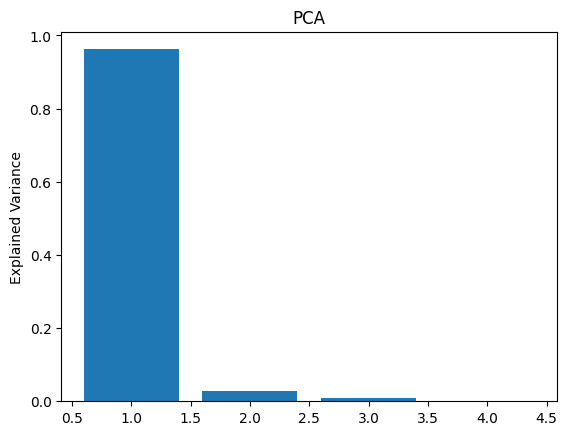

In [8]:
# plot the explained variance ratio
# add code here
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.title("PCA")
plt.ylabel("Explained Variance")
plt.show()

In [9]:
pca = PCA(n_components = 2)
pca_df = pca.fit_transform(iris_scaled)

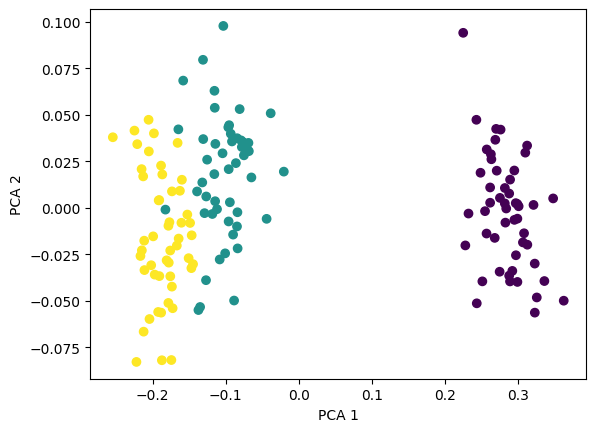

In [10]:
# plot the first two principal components
# add code here
Target = pd.Categorical(Target).codes
plt.scatter(pca_df[:,0], pca_df[:,1], c=Target)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [14]:
# perform t-SNE, MDS, t-SNE, and UMAP on the scaled data and compare the results
# add code here

# T-SNE

from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
tsne_df = tsne.fit_transform(iris_scaled)
tsne_df

array([[ 2.40466690e+01, -2.36830425e+00],
       [ 2.67992744e+01, -2.21874166e+00],
       [ 2.43344059e+01, -2.35105658e+00],
       [ 2.56170597e+01, -7.58416057e-01],
       [ 2.31125546e+01, -1.73099768e+00],
       [ 2.37226791e+01, -3.76207948e-01],
       [ 2.30982819e+01, -6.10780060e-01],
       [ 2.48493156e+01, -1.47526550e+00],
       [ 2.58947067e+01, -1.13827455e+00],
       [ 2.66968842e+01, -1.42897904e+00],
       [ 2.41776028e+01, -2.22865605e+00],
       [ 2.46293697e+01, -2.45830819e-01],
       [ 2.66453056e+01, -1.91439784e+00],
       [ 2.33485355e+01, -2.84239793e+00],
       [ 2.28829250e+01, -3.55044007e+00],
       [ 2.17981720e+01, -1.75464320e+00],
       [ 2.23387337e+01, -2.64263344e+00],
       [ 2.39603977e+01, -2.26067066e+00],
       [ 2.53421917e+01, -1.68303347e+00],
       [ 2.26732693e+01, -9.67258573e-01],
       [ 2.67344818e+01, -1.36240637e+00],
       [ 2.33158188e+01, -7.31123090e-01],
       [ 2.15088215e+01, -2.36722779e+00],
       [ 2.

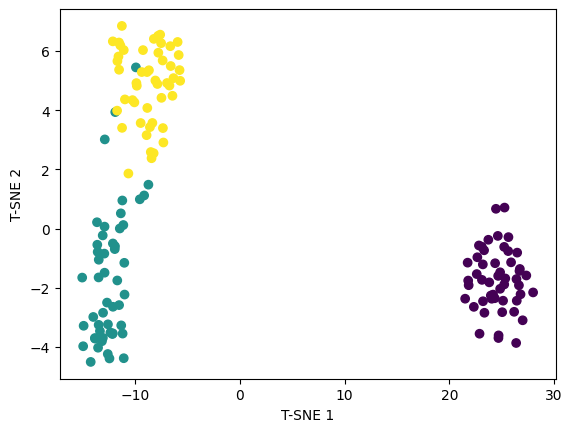

In [15]:
# add code here
plt.scatter(tsne_df[:,0], tsne_df[:,1], c = Target)
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')

plt.show()

In [23]:
# add code here
# UMAP
import umap
umap_model = umap.UMAP(n_components = 2)
df_umap = umap_model.fit_transform(iris_scaled)
df_umap

ModuleNotFoundError: No module named 'umap'

In [18]:
# add code here
plt.scatter(df_umap[:,0], df_umap[:,1], c=Target)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

NameError: name 'df_umap' is not defined

In [21]:
# add code here
# MDS

from sklearn.manifold import MDS
mds = MDS(n_components=2)
mds_df = mds.fit_transform(iris_scaled)
mds_df

array([[-1.13015154e-01,  2.79082617e-01],
       [-6.63766216e-02,  2.64690909e-01],
       [-1.13687238e-01,  2.74384792e-01],
       [-1.09593179e-01,  2.37038884e-01],
       [-1.31242923e-01,  2.78642052e-01],
       [-1.01815236e-01,  2.56988576e-01],
       [-1.47755722e-01,  2.51546721e-01],
       [-1.10748659e-01,  2.58859888e-01],
       [-1.01419569e-01,  2.40441217e-01],
       [-8.20597190e-02,  2.55839579e-01],
       [-1.16618477e-01,  2.75313293e-01],
       [-1.29579542e-01,  2.35502294e-01],
       [-6.94856494e-02,  2.70487358e-01],
       [-1.26645485e-01,  2.95664087e-01],
       [-1.42855055e-01,  3.20158958e-01],
       [-1.76007146e-01,  2.76792152e-01],
       [-1.15050616e-01,  3.08272617e-01],
       [-1.12310171e-01,  2.74076263e-01],
       [-1.03778819e-01,  2.54573254e-01],
       [-1.51916773e-01,  2.60970833e-01],
       [-7.92636378e-02,  2.44002013e-01],
       [-1.42873148e-01,  2.52644502e-01],
       [-1.88122234e-01,  3.14619555e-01],
       [-1.

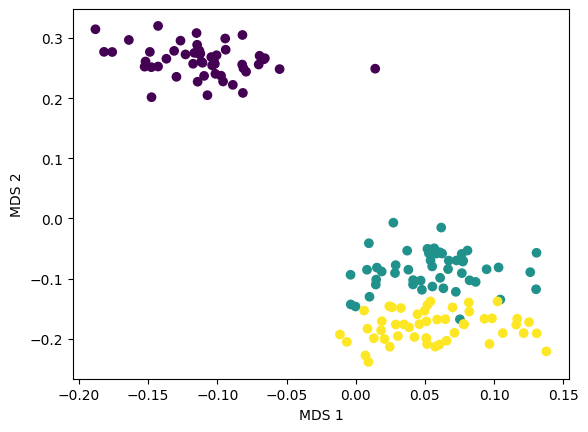

In [22]:
# add code here
plt.scatter(mds_df[:,0], mds_df[:,1], c= Target)
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.show()